## **Intro to NLP: Assignment 2. Offensive Language Detection**


Michele Belloli , Nasrin Rastgoo, Abel van Gennep



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set path to dat location
data_path = "/content/drive/MyDrive/NLP-2/"

Mounted at /content/drive


In [ ]:
np.random.seed(42)

In [ ]:
train = pd.read_csv(data_path+'olid-train.csv', delimiter = ',')
train

,id,text,labels
0,86426,@USER She should ask a few native Americans wh...,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
2,16820,Amazon is investigating Chinese employees who ...,0
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0
...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,1
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,0
13237,82921,@USER And why report this garbage. We don't g...,1
13238,27429,@USER Pussy,1


# Q.1

In [ ]:
tweets_off = pd.concat([train['labels'].value_counts(), 
                train['labels'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
tweets_off

,counts,percentage
0,8840,66.767372
1,4400,33.232628


In [ ]:
test = pd.read_csv(data_path+'olid-test.csv', delimiter = ',')
test

,id,text,labels
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0
3,13876,#Watching #Boomer getting the news that she is...,0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,1
...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,1
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,0
857,67018,3 people just unfollowed me for talking about ...,1
858,50665,#WednesdayWisdom Antifa calls the right fascis...,0


In [ ]:
tweets_off = pd.concat([test['labels'].value_counts(), 
                test['labels'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
tweets_off

,counts,percentage
0,620,72.093023
1,240,27.906977


Q.2

In [ ]:
def majority_baseline(trainlog, testlog):
    predictions = []


    majority_class = np.argmax(trainlog["labels"].value_counts())

    print("the majority class is:", majority_class)
    predictions = []
    count_majority= 0
    count_minority = 0

    majority_predictions =np.ones(testlog.shape[0]) * majority_class  #either 0 or 1 based on majority
    total_errors = sum(np.abs(majority_predictions - testlog["labels"].to_numpy()))
    accuracy = total_errors/testlog.shape[0]

    print("the accuracy of the majority baseline is: ", accuracy)
    print()
    return accuracy, majority_predictions

_, majority_predictions =majority_baseline(train, test)
print("fraction class 1 over total :", 240/860)

the majority class is: 0
the accuracy of the majority baseline is:  0.27906976744186046

fraction class 1 over total : 0.27906976744186046


In [ ]:
def random_baseline(trainlog, testlog):

    random_predictions = np.random.uniform(size=testlog.shape[0])
    random_predictions[random_predictions >0.5]= 1
    random_predictions[random_predictions <=0.5] = 0

    total_errors = sum(np.abs(random_predictions - testlog["labels"].to_numpy()))
    

    accuracy = total_errors / testlog.shape[0]
    print("the accuracy of the random baseline is: ", accuracy)

    return accuracy, random_predictions

_, random_predictions =random_baseline(train, test)

the accuracy of the random baseline is:  0.5337209302325582


In [ ]:
print(classification_report(test["labels"], majority_predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       620
           1       0.00      0.00      0.00       240

    accuracy                           0.72       860
   macro avg       0.36      0.50      0.42       860
weighted avg       0.52      0.72      0.60       860



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(test["labels"], random_predictions))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56       620
           1       0.25      0.45      0.32       240

    accuracy                           0.47       860
   macro avg       0.47      0.46      0.44       860
weighted avg       0.57      0.47      0.49       860



#Q.3

In [ ]:
!pip install simpletransformers


     |████████████████████████████████| 249 kB 4.1 MB/s 
     |████████████████████████████████| 1.8 MB 42.3 MB/s 
     |████████████████████████████████| 342 kB 49.7 MB/s 
     |████████████████████████████████| 4.2 MB 43.8 MB/s 
     |████████████████████████████████| 6.6 MB 31.3 MB/s 
     |████████████████████████████████| 10.1 MB 30.7 MB/s 
     |████████████████████████████████| 1.2 MB 52.8 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 596 kB 27.2 MB/s 
     |████████████████████████████████| 145 kB 53.1 MB/s 
     |████████████████████████████████| 181 kB 47.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 212 kB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.5 MB/s 
     |████████████████████████████████| 136 kB 50.3 MB/s 
     |████████████████████████████████| 127 kB 46.3 MB/s 
     |██████████████

In [ ]:
# from simpletransformers.classification import ClassificationModel

# model = ClassificationModel(
#     "bert", "bert-base-cased"
# )

**Some research into hyperparameters, no need to run this!** 



In [ ]:
# IMPORTS 
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.model_selection import train_test_split

In [ ]:
import sklearn


train =train.drop(columns="id")
# model.args.overwrite_output_dir=True
# model.train_model(train,  acc=sklearn.metrics.classification_report)

In [ ]:
import pickle
#pickle.dump(model, open("save.model", "wb" ))

model =pickle.load(open( "/content/drive/MyDrive/NLP-2/save.model", "rb" ))

In [ ]:
test = pd.read_csv(data_path+'olid-test.csv', delimiter = ',')
print(type(test["text"][0]))

<class 'str'>


In [ ]:
# print(test["text"].values)
predictions, _ =model.predict(list(test["text"].values))
pickle.dump(predictions, open(data_path+"save.predictions", "wb" ))
# predictions2, _ =model2.predict(list(test["text"].values))
print(predictions)
print(classification_report(test["labels"], predictions))
# print(classification_report(test["labels"], predictions2))
predictions = pickle.load(open(data_path+"save.predictions", "rb" ))

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 

[[576  44]
 [ 89 151]]


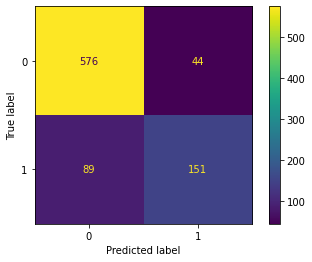

In [ ]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cm =confusion_matrix(test["labels"], predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(cm)


# Q.4

In [ ]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
number_of_tokens = 0
words_split = 0
total_splits = 0 
subtoken_length = 0 
number_of_subtokens = 0

for obs in train['text']:
  number_of_subtokens += len(model.tokenizer.tokenize(obs)) # number of tokens after split by model
  
  for subtoken in model.tokenizer.tokenize(obs):
    # To find splits based on starting with '#' 
    if subtoken[0] == '#' and subtoken != '#' and word_is_splitted == False:
      words_split += 1
      total_splits += 1
      word_is_splitted = True

    elif subtoken[0] == '#' and subtoken != '#' and word_is_splitted == True:
      total_splits += 1

    else:
      word_is_splitted = False
    
    # Calculate longest subtoken
    if len(subtoken) > subtoken_length:
      print(subtoken)
      print(len(subtoken))
      subtoken_length = len(subtoken)

number_of_tokens = number_of_subtokens - total_splits

print("Number of tokens", number_of_tokens)
print("Number of subtokens", number_of_subtokens) # Number of subtokens is not needed for question

print("Number of words with 1 or more splits:", words_split)
print("Total splits:", total_splits)
print("average number of subtokens:", 1 + total_splits/number_of_tokens)
print("average number of subtokens:", 1 + total_splits/words_split)






@
1
US
2
##ER
4
should
6
Americans
9
investigating
13
##rivatization
14
representatives
15
unconstitutional
16
Number of tokens 387931
Number of subtokens 478955
Number of words with 1 or more splits: 67045
Total splits: 91024
average number of subtokens: 1.2346396653013036
average number of subtokens: 2.357655306137669


In [ ]:
for i in model.tokenizer.tokenize(train.loc[10, "text"]):
  print(i)

@
US
##ER
@
US
##ER
@
US
##ER
It
’
s
not
my
fault
you
support
gun
control


In [ ]:
for i in word_tokenize(train.loc[10, "text"]):
  print(i)

@
USER
@
USER
@
USER
It
’
s
not
my
fault
you
support
gun
control


#Q.5

In [ ]:
!pip install checklist

  Using cached checklist-0.0.11.tar.gz (12.1 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached patternfork_nosql-3.6.tar.gz (22.3 MB)
  Using cached iso-639-0.4.5.tar.gz (167 kB)


In [ ]:
import checklist
from checklist.editor import Editor
from checklist.perturb import Perturb

# data = train.loc[100,:]

# Perturb.add_typos(data)

In [ ]:
olid_subset = pd.read_csv(data_path+'olid-subset-diagnostic-tests.csv', delimiter = ',')
olid_subset

In [ ]:
typo = []
for i in range (0,len(olid_subset['text'])):
  typo.append(Perturb.add_typos(olid_subset['text'][i]))

olid_subset['typo'] = typo
olid_subset

In [ ]:
#prediction on text_column
predictions_text, _ =model.predict(list(olid_subset["text"].values))
print(classification_report(olid_subset["labels"], predictions_text))

In [ ]:
#prediction on typo_column
predictions_typo, _ =model.predict(list(olid_subset["typo"].values))
print(classification_report(olid_subset["labels"], predictions_typo))

In [ ]:
olid_subset['prediction_text'] = predictions_text
olid_subset['prediction_typo'] = predictions_typo
olid_subset

In [ ]:
#difference non-perturb and perturbed
differ_original = 0
for i in range (0,100):
  if olid_subset['prediction_text'][i] != olid_subset['prediction_typo'][i]:
    if olid_subset['prediction_text'][i] == olid_subset['labels'][i]:
      differ_original+= 1

differ_original

#Q.6

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
pdata = list(nlp.pipe(olid_subset['text']))

In [ ]:
#add negation
ret = Perturb.perturb(pdata, Perturb.add_negation)
negation = []
for i in range (0,len(olid_subset['text'])):
  negation.append(ret.data[i][1])

olid_subset['negation'] = negation
olid_subset

In [ ]:
for i in list(olid_subset["negation"]):
  print(i)

In [ ]:
#prediction on negation_column
predictions_negation, _ = model.predict(list(olid_subset["negation"].values))
print(classification_report(olid_subset["labels"], predictions_negation))

In [ ]:
olid_subset['prediction_negation'] = predictions_text

In [ ]:
olid_subset.loc[50:]

# Q7

In [ ]:
import pickle

model =pickle.load(open( "/content/drive/MyDrive/NLP-2/save.model", "rb" ))

In [ ]:
editor = Editor()

print("Mask:")
ret = editor.template('I hate {mask}')
prediction, _ = model.predict(ret.data)

df = pd.DataFrame(data={'Mask positive': ret.data, 'prediction': prediction})
print(df.head(15))

ret = editor.template("I don’t hate {mask}")
prediction, _ = model.predict(ret.data)

df = pd.DataFrame(data={'Mask negative': ret.data, 'prediction': prediction})
print(df.head(15))

print("--")
print("Nationality")
ret = editor.template('I hate {nationality}')
prediction, _ = model.predict(ret.data)

df = pd.DataFrame(data={'Nationality positive': ret.data, 'prediction': prediction})
print(df.head(15))

ret = editor.template('I don’t hate {nationality}')
prediction, _ = model.predict(ret.data)

df = pd.DataFrame(data={'Nesionality negative': ret.data, 'prediction': prediction})
print(df.head(15))

print("--")
print("Religion")

ret = editor.template('I hate {religion}')
prediction, _ = model.predict(ret.data)

df = pd.DataFrame(data={'Nationality positive': ret.data, 'prediction': prediction})
print(df.head(15))

ret = editor.template('I don’t hate {religion}')
prediction, _ = model.predict(ret.data)

df = pd.DataFrame(data={'Religion negative': ret.data, 'prediction': prediction})
print(df.head(15))


Mask:


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

        Mask positive  prediction
0           I hate it           0
1   I hate capitalism           0
2        I hate Trump           0
3       I hate racism           0
4         I hate them           1
5          I hate you           1
6     I hate politics           0
7         I hate this           1
8         I hate that           0
9          I hate him           1
10      I hate people           1
11       I hate death           1
12         I hate her           0
13      I hate robots           1
14         I hate […]           0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

              Mask negative  prediction
0          I don’t hate you           0
1       I don’t hate people           0
2         I don’t hate them           0
3          I don’t hate him           0
4        I don’t hate Trump           0
5          I don’t hate her           0
6           I don’t hate it           0
7         I don’t hate gays           1
8      I don’t hate Muslims           0
9       I don’t hate racism           0
10      I don’t hate anyone           0
11        I don’t hate Jews           0
12      I don’t hate myself           0
13    I don’t hate religion           0
14  I don’t hate capitalism           0
--
Nationality


  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

   Nationality positive  prediction
0        I hate Chinese           0
1         I hate Indian           0
2       I hate American           0
3     I hate Indonesian           0
4      I hate Pakistani           0
5      I hate Brazilian           0
6       I hate Nigerian           1
7    I hate Bangladeshi           0
8        I hate Russian           0
9       I hate Japanese           0
10       I hate Mexican           0
11     I hate Ethiopian           0
12    I hate Philippine           0
13      I hate Egyptian           0
14    I hate Vietnamese           0


  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

        Nesionality negative  prediction
0       I don’t hate Chinese           0
1        I don’t hate Indian           0
2      I don’t hate American           0
3    I don’t hate Indonesian           0
4     I don’t hate Pakistani           0
5     I don’t hate Brazilian           0
6      I don’t hate Nigerian           0
7   I don’t hate Bangladeshi           0
8       I don’t hate Russian           0
9      I don’t hate Japanese           0
10      I don’t hate Mexican           0
11    I don’t hate Ethiopian           0
12   I don’t hate Philippine           0
13     I don’t hate Egyptian           0
14   I don’t hate Vietnamese           0
--
Religion


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

     Nationality positive  prediction
0     I hate Christianity           0
1          I hate Judaism           0
2            I hate Islam           0
3         I hate Buddhism           0
4   I hate Zoroastrianism           0
5         I hate Hinduism           0
6          I hate Sikhism           0
7        I hate Shintoism           0
8           I hate Baha'i           0
9           I hate Taoism           0
10    I hate Confucianism           0
11            I hate Jain           0
12         I hate Atheism           0
13     I hate Agnosticism           0


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

              Religion negative  prediction
0     I don’t hate Christianity           0
1          I don’t hate Judaism           0
2            I don’t hate Islam           0
3         I don’t hate Buddhism           0
4   I don’t hate Zoroastrianism           0
5         I don’t hate Hinduism           0
6          I don’t hate Sikhism           0
7        I don’t hate Shintoism           0
8           I don’t hate Baha'i           0
9           I don’t hate Taoism           0
10    I don’t hate Confucianism           0
11            I don’t hate Jain           0
12         I don’t hate Atheism           0
13     I don’t hate Agnosticism           0
